In [1]:
sample_or_prod = True #True = sample, False = production

train_valid_fract = 0.3
sample_fract = 0.2

In [2]:
HOMEPATH = "/home/ubuntu/fastai/"
DATA_PATH = HOMEPATH + "data/fish/"
print("HOMEPATH:", HOMEPATH)
print("DATA_PATH:", DATA_PATH)
import os

from datetime import datetime
from glob import glob
from random import shuffle
from shutil import copyfile
from __future__ import division, print_function

('HOMEPATH:', '/home/ubuntu/fastai/')
('DATA_PATH:', '/home/ubuntu/fastai/data/fish/')


In [3]:
from theano.sandbox import cuda

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)


In [4]:
os.chdir(HOMEPATH)
print ("os.getcwd:", os.getcwd())

%matplotlib inline
import utils; reload(utils)
from utils import *
from __future__ import division, print_function

os.getcwd: /home/ubuntu/fastai


Using Theano backend.


In [5]:
#path = "data/fish/sample/"
path = DATA_PATH
batch_size=64

In [6]:
MODEL_PATH = DATA_PATH+"models/"
RESULTS_PATH = DATA_PATH+"results/"


SAMPLE_DATA_PATH = DATA_PATH + "sample/"#choose this for testing or above for production
SAMPLE_TEST_PATH = SAMPLE_DATA_PATH+"test/"
SAMPLE_TRAIN_PATH = SAMPLE_DATA_PATH + "train/"
SAMPLE_VALID_PATH = SAMPLE_DATA_PATH + "valid/"


TEST_PATH = DATA_PATH+"test/"
TRAIN_PATH = DATA_PATH + "train/"
VALID_PATH = DATA_PATH + "valid/"

if sample_or_prod:
    WORKING_DATA  = SAMPLE_DATA_PATH
    WORKING_TEST  = SAMPLE_TEST_PATH
    WORKING_TRAIN = SAMPLE_TRAIN_PATH
    WORKING_VALID = SAMPLE_VALID_PATH
    s_or_p = "_sample_"
else:
    WORKING_DATA  = DATA_PATH
    WORKING_TEST  = TEST_PATH
    WORKING_TRAIN = TRAIN_PATH
    WORKING_VALID = VALID_PATH
    s_or_p = "_prod_"

    
print ("WORKING_DATA:", WORKING_DATA)
print ("WORKING_TEST:", WORKING_TEST)
print ("WORKING_TRAIN:", WORKING_TRAIN)
print ("WORKING_VALID:", WORKING_VALID)
print ("s_or_p:", s_or_p)

WORKING_DATA: /home/ubuntu/fastai/data/fish/sample/
WORKING_TEST: /home/ubuntu/fastai/data/fish/sample/test/
WORKING_TRAIN: /home/ubuntu/fastai/data/fish/sample/train/
WORKING_VALID: /home/ubuntu/fastai/data/fish/sample/valid/
s_or_p: _sample_


In [7]:
#since this dataset unzips files into category subdirectories we can obtain categories from a directory list.
print ("TRAIN_PATH:", TRAIN_PATH)
CATEGORIES = list(os.walk(TRAIN_PATH))[0][1]
print ("CATEGORIES:", CATEGORIES)
for i in range(len(CATEGORIES)):
    CATEGORIES[i] = CATEGORIES[i] + "/"
print ("CATEGORIES:", CATEGORIES)


TRAIN_PATH: /home/ubuntu/fastai/data/fish/train/
CATEGORIES: ['OTHER', 'LAG', 'ALB', 'NoF', 'BET', 'SHARK', 'DOL', 'YFT']
CATEGORIES: ['OTHER/', 'LAG/', 'ALB/', 'NoF/', 'BET/', 'SHARK/', 'DOL/', 'YFT/']


In [8]:
def dirFileList(dir_path):
    return [name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))]


In [9]:
def listDirsFileCount(DATA_DIR_LIST):
    DATA_DIR_LIST = sorted(DATA_DIR_LIST)
    for dir_ in DATA_DIR_LIST:
        try:
            numFiles = len(dirFileList(dir_))
            print (dir_, numFiles)
        except Exception as e: 
            print("\nlistDirsFileCount:"+dir_+"\n"+ str(e)+"\n")


In [10]:
#check if dir exists, create if not already.
def makeNewDir(newDirPath):
    if not os.path.exists(newDirPath): 
        print("directory ", newDirPath, " did not exist, creating:")
        os.mkdir(newDirPath)
    else:
        print("directory ", newDirPath, "already existed. filecount = ", len(dirFileList(newDirPath)))


In [11]:
UNKNOWN = 'unknown/'

#NB: train and test are created by unzipping the data.
makeNewDir(SAMPLE_DATA_PATH)
makeNewDir(SAMPLE_TEST_PATH)
makeNewDir(SAMPLE_TEST_PATH+UNKNOWN)
makeNewDir(SAMPLE_TRAIN_PATH)
makeNewDir(SAMPLE_VALID_PATH)

makeNewDir(MODEL_PATH)
makeNewDir(RESULTS_PATH)

makeNewDir(TEST_PATH)
makeNewDir(TEST_PATH+UNKNOWN)
makeNewDir(TRAIN_PATH)
makeNewDir(VALID_PATH)

DATA_DIR_LIST = [DATA_PATH, SAMPLE_DATA_PATH, SAMPLE_TEST_PATH, SAMPLE_TEST_PATH+UNKNOWN, SAMPLE_TRAIN_PATH, 
                 SAMPLE_VALID_PATH, TEST_PATH, TEST_PATH+UNKNOWN, TRAIN_PATH, VALID_PATH, MODEL_PATH, RESULTS_PATH]



for category in CATEGORIES:
    makeNewDir(TRAIN_PATH+category)
    makeNewDir(VALID_PATH+category)
    makeNewDir(SAMPLE_TRAIN_PATH+category)
    makeNewDir(SAMPLE_VALID_PATH+category)
    #
    DATA_DIR_LIST.append(TRAIN_PATH+category)
    DATA_DIR_LIST.append(VALID_PATH+category)
    DATA_DIR_LIST.append(SAMPLE_TRAIN_PATH+category)
    DATA_DIR_LIST.append(SAMPLE_VALID_PATH+category)
    
DATA_DIR_LIST.append(DATA_PATH + "test_stg1/") #destination for unzipped files from kaggle
DATA_DIR_LIST.append(DATA_PATH + "test_stg2/") #destination for unzipped files from kaggle



directory  /home/ubuntu/fastai/data/fish/sample/ already existed. filecount =  0
directory  /home/ubuntu/fastai/data/fish/sample/test/ already existed. filecount =  0
directory  /home/ubuntu/fastai/data/fish/sample/test/unknown/ already existed. filecount =  200
directory  /home/ubuntu/fastai/data/fish/sample/train/ already existed. filecount =  0
directory  /home/ubuntu/fastai/data/fish/sample/valid/ already existed. filecount =  0
directory  /home/ubuntu/fastai/data/fish/models/ already existed. filecount =  0
directory  /home/ubuntu/fastai/data/fish/results/ already existed. filecount =  0
directory  /home/ubuntu/fastai/data/fish/test/ already existed. filecount =  0
directory  /home/ubuntu/fastai/data/fish/test/unknown/ already existed. filecount =  1000
directory  /home/ubuntu/fastai/data/fish/train/ already existed. filecount =  1
directory  /home/ubuntu/fastai/data/fish/valid/ already existed. filecount =  0
directory  /home/ubuntu/fastai/data/fish/train/OTHER/ already existed. 

In [12]:
listDirsFileCount(DATA_DIR_LIST)

/home/ubuntu/fastai/data/fish/ 7
/home/ubuntu/fastai/data/fish/models/ 0
/home/ubuntu/fastai/data/fish/results/ 0
/home/ubuntu/fastai/data/fish/sample/ 0
/home/ubuntu/fastai/data/fish/sample/test/ 0
/home/ubuntu/fastai/data/fish/sample/test/unknown/ 200
/home/ubuntu/fastai/data/fish/sample/train/ 0
/home/ubuntu/fastai/data/fish/sample/train/ALB/ 240
/home/ubuntu/fastai/data/fish/sample/train/BET/ 28
/home/ubuntu/fastai/data/fish/sample/train/DOL/ 16
/home/ubuntu/fastai/data/fish/sample/train/LAG/ 9
/home/ubuntu/fastai/data/fish/sample/train/NoF/ 65
/home/ubuntu/fastai/data/fish/sample/train/OTHER/ 42
/home/ubuntu/fastai/data/fish/sample/train/SHARK/ 24
/home/ubuntu/fastai/data/fish/sample/train/YFT/ 102
/home/ubuntu/fastai/data/fish/sample/valid/ 0
/home/ubuntu/fastai/data/fish/sample/valid/ALB/ 103
/home/ubuntu/fastai/data/fish/sample/valid/BET/ 12
/home/ubuntu/fastai/data/fish/sample/valid/DOL/ 7
/home/ubuntu/fastai/data/fish/sample/valid/LAG/ 4
/home/ubuntu/fastai/data/fish/sample/v

In [13]:
os.chdir(DATA_PATH)
print (os.getcwd())
!tree -d

/home/ubuntu/fastai/data/fish
.
├── annos
├── __MACOSX
│   └── train
├── models
├── results
├── sample
│   ├── test
│   │   └── unknown
│   ├── train
│   │   ├── ALB
│   │   ├── BET
│   │   ├── DOL
│   │   ├── LAG
│   │   ├── NoF
│   │   ├── OTHER
│   │   ├── SHARK
│   │   └── YFT
│   └── valid
│       ├── ALB
│       ├── BET
│       ├── DOL
│       ├── LAG
│       ├── NoF
│       ├── OTHER
│       ├── SHARK
│       └── YFT
├── test
│   └── unknown
├── test_stg1
├── train
│   ├── ALB
│   ├── BET
│   ├── DOL
│   ├── LAG
│   ├── NoF
│   ├── OTHER
│   ├── SHARK
│   └── YFT
└── valid
    ├── ALB
    ├── BET
    ├── DOL
    ├── LAG
    ├── NoF
    ├── OTHER
    ├── SHARK
    └── YFT

47 directories


In [14]:
def showLayersInfo(model):
    print ("Number of layers : ", len(model.layers))
    count = 0
    for layer in model.layers:
        print (count, type(layer), ", trainable:", layer.trainable)
        print ("input:", layer.input_shape, ", output:",layer.output_shape, "\n")
        count +=1

In [15]:
def plot_history(histories):
    #histories : list of history objects. nb: history.history dictionary structure
    print ("len(histories):", len(histories))
    if len(histories)==1: 
        history = histories
        #needs fix
    else:
        #create empty history to copy into
        history = {}
        for i in histories[0].history.keys():
            history[i] = []
        #now combine all history[key] lists into one history[key] list.
        for hist in histories:
            for key in history.keys():
                history[key] += hist.history[key]
                #print (key, len(hist.history[key]), len(history[key]))

    # list all data in history
    print(history.keys(), len(history[history.keys()[0]]))
    for key in history.keys():
        print (key, ":", history[key][-1])

    # summarize history for accuracy
    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validate'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validate'], loc='upper left')
    plt.show()

In [16]:
print ("WORKING_TRAIN:", WORKING_TRAIN)
print ("WORKING_VALID:", WORKING_VALID)

WORKING_TRAIN: /home/ubuntu/fastai/data/fish/sample/train/
WORKING_VALID: /home/ubuntu/fastai/data/fish/sample/valid/


In [17]:
vgg640 = Vgg16BN((360, 640)).model
print ("vgg640.input_shape:", vgg640.input_shape)
print ("vgg640.output_shape:", vgg640.output_shape)
print(len(vgg640.layers))

vgg640.input_shape: (None, 3, 360, 640)
vgg640.output_shape: (None, 512, 11, 20)
32


In [18]:
vgg640.pop()
print(len(vgg640.layers))
print ("vgg640.input_shape:", vgg640.input_shape)
print ("vgg640.output_shape:", vgg640.output_shape)
vgg640.compile(Adam(), 'categorical_crossentropy', metrics=['accuracy'])

31
vgg640.input_shape: (None, 3, 360, 640)
vgg640.output_shape: (None, 512, 22, 40)


In [19]:
vgg640.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 360, 640)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 362, 642)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 360, 640)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 362, 642)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [20]:
showLayersInfo(vgg640)

Number of layers :  31
0 <class 'keras.layers.core.Lambda'> , trainable: True
input: (None, 3, 360, 640) , output: (None, 3, 360, 640) 

1 <class 'keras.layers.convolutional.ZeroPadding2D'> , trainable: True
input: (None, 3, 360, 640) , output: (None, 3, 362, 642) 

2 <class 'keras.layers.convolutional.Convolution2D'> , trainable: True
input: (None, 3, 362, 642) , output: (None, 64, 360, 640) 

3 <class 'keras.layers.convolutional.ZeroPadding2D'> , trainable: True
input: (None, 64, 360, 640) , output: (None, 64, 362, 642) 

4 <class 'keras.layers.convolutional.Convolution2D'> , trainable: True
input: (None, 64, 362, 642) , output: (None, 64, 360, 640) 

5 <class 'keras.layers.pooling.MaxPooling2D'> , trainable: True
input: (None, 64, 360, 640) , output: (None, 64, 180, 320) 

6 <class 'keras.layers.convolutional.ZeroPadding2D'> , trainable: True
input: (None, 64, 180, 320) , output: (None, 64, 182, 322) 

7 <class 'keras.layers.convolutional.Convolution2D'> , trainable: True
input: (No

In [21]:
conv_layers,_ = split_at(vgg640, Convolution2D)
#utils.split_at(model, layer_type)

In [22]:
showLayersInfo(Sequential(conv_layers))
#9 layers, only last layers is trainable

Number of layers :  31
0 <class 'keras.layers.core.Lambda'> , trainable: True
input: (None, 3, 360, 640) , output: (None, 3, 360, 640) 

1 <class 'keras.layers.convolutional.ZeroPadding2D'> , trainable: True
input: (None, 3, 360, 640) , output: (None, 3, 362, 642) 

2 <class 'keras.layers.convolutional.Convolution2D'> , trainable: True
input: (None, 3, 362, 642) , output: (None, 64, 360, 640) 

3 <class 'keras.layers.convolutional.ZeroPadding2D'> , trainable: True
input: (None, 64, 360, 640) , output: (None, 64, 362, 642) 

4 <class 'keras.layers.convolutional.Convolution2D'> , trainable: True
input: (None, 64, 362, 642) , output: (None, 64, 360, 640) 

5 <class 'keras.layers.pooling.MaxPooling2D'> , trainable: True
input: (None, 64, 360, 640) , output: (None, 64, 180, 320) 

6 <class 'keras.layers.convolutional.ZeroPadding2D'> , trainable: True
input: (None, 64, 180, 320) , output: (None, 64, 182, 322) 

7 <class 'keras.layers.convolutional.Convolution2D'> , trainable: True
input: (No

In [38]:
nf=128; p=0.4  #NB: was originally p=0 trying different dropout for impact on training.

In [39]:
def get_lrg_layers():
    return [
        BatchNormalization(axis=1, input_shape=conv_layers[-1].output_shape[1:]),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D((1,2)),
        Convolution2D(8,3,3, border_mode='same'),
        Dropout(p),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ]

In [40]:
#NB: dropout set to zero by p=0 above.
#vgg640 = Vgg16BN((360, 640)).model
#conv_layers,_ = split_at(vgg640, Convolution2D)
#input_shape=conv_layers[-1].output_shape[1:]
#NB: input shape of layers return by get_lrg_layers() is defined by 
# the output shape of Vgg16BN split at last Convolution2D layer.


In [41]:
lrg_model = Sequential(get_lrg_layers())


In [42]:
lrg_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_5 (BatchNorma (None, 512, 22, 40)   2048        batchnormalization_input_2[0][0] 
____________________________________________________________________________________________________
convolution2d_18 (Convolution2D) (None, 128, 22, 40)   589952      batchnormalization_5[0][0]       
____________________________________________________________________________________________________
batchnormalization_6 (BatchNorma (None, 128, 22, 40)   512         convolution2d_18[0][0]           
____________________________________________________________________________________________________
maxpooling2d_9 (MaxPooling2D)    (None, 128, 11, 20)   0           batchnormalization_6[0][0]       
___________________________________________________________________________________________

In [43]:
showLayersInfo(lrg_model)

Number of layers :  14
0 <class 'keras.layers.normalization.BatchNormalization'> , trainable: True
input: (None, 512, 22, 40) , output: (None, 512, 22, 40) 

1 <class 'keras.layers.convolutional.Convolution2D'> , trainable: True
input: (None, 512, 22, 40) , output: (None, 128, 22, 40) 

2 <class 'keras.layers.normalization.BatchNormalization'> , trainable: True
input: (None, 128, 22, 40) , output: (None, 128, 22, 40) 

3 <class 'keras.layers.pooling.MaxPooling2D'> , trainable: True
input: (None, 128, 22, 40) , output: (None, 128, 11, 20) 

4 <class 'keras.layers.convolutional.Convolution2D'> , trainable: True
input: (None, 128, 11, 20) , output: (None, 128, 11, 20) 

5 <class 'keras.layers.normalization.BatchNormalization'> , trainable: True
input: (None, 128, 11, 20) , output: (None, 128, 11, 20) 

6 <class 'keras.layers.pooling.MaxPooling2D'> , trainable: True
input: (None, 128, 11, 20) , output: (None, 128, 5, 10) 

7 <class 'keras.layers.convolutional.Convolution2D'> , trainable: T

In [44]:
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
#recall
#trn = get_data(WORKING_TRAIN, (360,640))
#conv_trn_feat = vgg640.predict(trn, batch_size=32, verbose=1)
#(val_classes, trn_classes, val_labels, trn_labels, val_filenames, filenames, test_filenames) = get_classes(WORKING_DATA)
#val = get_data(WORKING_VALID, (360,640))
#conv_val_feat = vgg640.predict(val, batch_size=32, verbose=1)


In [46]:
trn = get_data(WORKING_TRAIN, (360,640))

Found 526 images belonging to 8 classes.


In [72]:
"trn", type(trn), trn.shape

('trn', numpy.ndarray, (526, 3, 360, 640))

In [47]:
conv_trn_feat = vgg640.predict(trn, batch_size=32, verbose=1)

526/526 [==============================] - 67s    


In [48]:
(val_classes, trn_classes, val_labels, trn_labels, val_filenames, filenames, test_filenames) = get_classes(WORKING_DATA)

Found 526 images belonging to 8 classes.
Found 224 images belonging to 8 classes.
Found 200 images belonging to 1 classes.


In [49]:
val = get_data(WORKING_VALID, (360,640))

Found 224 images belonging to 8 classes.


In [50]:
conv_val_feat = vgg640.predict(val, batch_size=32, verbose=1)

224/224 [==============================] - 28s    


In [51]:
print ("conv_trn_feat:", type(conv_trn_feat), conv_trn_feat.shape)

conv_trn_feat: <type 'numpy.ndarray'> (526, 512, 22, 40)


In [52]:
history1 = lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=5, 
             validation_data=(conv_val_feat, val_labels))

Train on 526 samples, validate on 224 samples
Epoch 1/5
526/526 [==============================] - 2s - loss: 1.3742 - acc: 0.5323 - val_loss: 8.3042 - val_acc: 0.1964
Epoch 2/5
526/526 [==============================] - 2s - loss: 0.5349 - acc: 0.8479 - val_loss: 3.5566 - val_acc: 0.5312
Epoch 3/5
526/526 [==============================] - 2s - loss: 0.2357 - acc: 0.9373 - val_loss: 3.5263 - val_acc: 0.2946
Epoch 4/5
526/526 [==============================] - 2s - loss: 0.0987 - acc: 0.9848 - val_loss: 1.9841 - val_acc: 0.6339
Epoch 5/5
526/526 [==============================] - 2s - loss: 0.0462 - acc: 1.0000 - val_loss: 2.3417 - val_acc: 0.6339


In [53]:
print ("history1:", history1, type(history1), type(history1.history.keys()) )
print (history1.history.keys())


history1: <keras.callbacks.History object at 0x7f4bb11a12d0> <class 'keras.callbacks.History'> <type 'list'>
['acc', 'loss', 'val_acc', 'val_loss']


In [54]:
lrg_model.optimizer.lr=1e-5

In [55]:
history2 = lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=6, 
             validation_data=(conv_val_feat, val_labels))

Train on 526 samples, validate on 224 samples
Epoch 1/6
526/526 [==============================] - 2s - loss: 0.0304 - acc: 0.9962 - val_loss: 1.9027 - val_acc: 0.5848
Epoch 2/6
526/526 [==============================] - 2s - loss: 0.0180 - acc: 0.9981 - val_loss: 1.4854 - val_acc: 0.6562
Epoch 3/6
526/526 [==============================] - 2s - loss: 0.0122 - acc: 1.0000 - val_loss: 1.4248 - val_acc: 0.6830
Epoch 4/6
526/526 [==============================] - 2s - loss: 0.0122 - acc: 0.9962 - val_loss: 1.2830 - val_acc: 0.6339
Epoch 5/6
526/526 [==============================] - 2s - loss: 0.0090 - acc: 0.9981 - val_loss: 1.0402 - val_acc: 0.7455
Epoch 6/6
526/526 [==============================] - 2s - loss: 0.0079 - acc: 0.9981 - val_loss: 1.5648 - val_acc: 0.6964


len(histories): 2
['acc', 'loss', 'val_acc', 'val_loss'] 11
acc : 0.998098859316
loss : 0.00791872352248
val_acc : 0.696428571429
val_loss : 1.56476002719


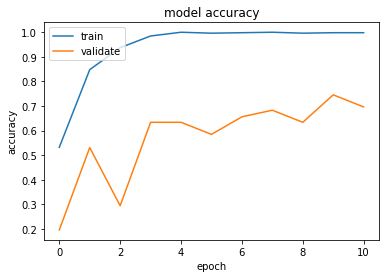

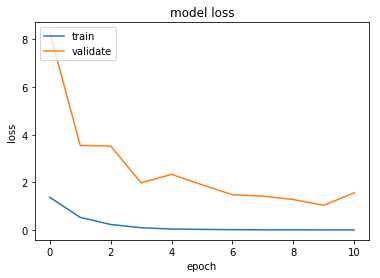

In [56]:
plot_history([history1, history2])

In [57]:
history3 = lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=6, 
             validation_data=(conv_val_feat, val_labels))

Train on 526 samples, validate on 224 samples
Epoch 1/6
526/526 [==============================] - 2s - loss: 0.0071 - acc: 1.0000 - val_loss: 1.3652 - val_acc: 0.7277
Epoch 2/6
526/526 [==============================] - 2s - loss: 0.0043 - acc: 1.0000 - val_loss: 1.2588 - val_acc: 0.7545
Epoch 3/6
526/526 [==============================] - 2s - loss: 0.0050 - acc: 1.0000 - val_loss: 0.9238 - val_acc: 0.7812
Epoch 4/6
526/526 [==============================] - 2s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.8135 - val_acc: 0.8170
Epoch 5/6
526/526 [==============================] - 2s - loss: 0.0035 - acc: 0.9981 - val_loss: 0.9198 - val_acc: 0.8170
Epoch 6/6
526/526 [==============================] - 2s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.9039 - val_acc: 0.8170


len(histories): 3
['acc', 'loss', 'val_acc', 'val_loss'] 17
acc : 1.0
loss : 0.00212384952664
val_acc : 0.816964285714
val_loss : 0.903861179948


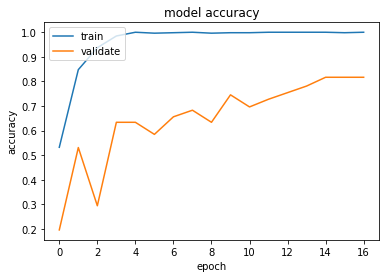

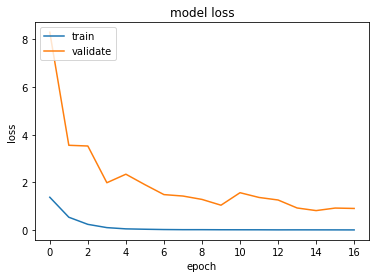

In [58]:
plot_history([history1, history2, history3])

In [59]:
history4 = lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=6, 
             validation_data=(conv_val_feat, val_labels))

Train on 526 samples, validate on 224 samples
Epoch 1/6
526/526 [==============================] - 2s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.8419 - val_acc: 0.8304
Epoch 2/6
526/526 [==============================] - 2s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.8212 - val_acc: 0.8170
Epoch 3/6
526/526 [==============================] - 2s - loss: 9.5544e-04 - acc: 1.0000 - val_loss: 0.8148 - val_acc: 0.8214
Epoch 4/6
526/526 [==============================] - 2s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.8003 - val_acc: 0.8304
Epoch 5/6
526/526 [==============================] - 2s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.7986 - val_acc: 0.8304
Epoch 6/6
526/526 [==============================] - 2s - loss: 9.2562e-04 - acc: 1.0000 - val_loss: 0.8893 - val_acc: 0.8259


len(histories): 4
['acc', 'loss', 'val_acc', 'val_loss'] 23
acc : 1.0
loss : 0.000925622793535
val_acc : 0.825892857143
val_loss : 0.889252790383


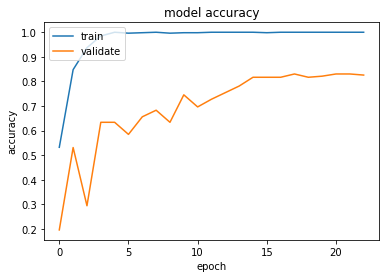

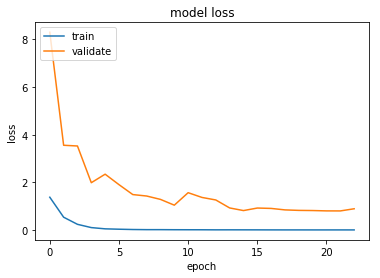

In [60]:
plot_history([history1, history2, history3, history4])

In [61]:
history5 = lrg_model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=20, 
             validation_data=(conv_val_feat, val_labels))

Train on 526 samples, validate on 224 samples
Epoch 1/20
526/526 [==============================] - 2s - loss: 0.0070 - acc: 0.9962 - val_loss: 0.9288 - val_acc: 0.7768
Epoch 2/20
526/526 [==============================] - 2s - loss: 0.0147 - acc: 0.9962 - val_loss: 0.8298 - val_acc: 0.7991
Epoch 3/20
526/526 [==============================] - 2s - loss: 0.0147 - acc: 0.9962 - val_loss: 0.8956 - val_acc: 0.7857
Epoch 4/20
526/526 [==============================] - 2s - loss: 0.1067 - acc: 0.9772 - val_loss: 1.4798 - val_acc: 0.7366
Epoch 5/20
526/526 [==============================] - 2s - loss: 0.1335 - acc: 0.9639 - val_loss: 1.3433 - val_acc: 0.6786
Epoch 6/20
526/526 [==============================] - 2s - loss: 0.0745 - acc: 0.9829 - val_loss: 1.6450 - val_acc: 0.7455
Epoch 7/20
526/526 [==============================] - 2s - loss: 0.1225 - acc: 0.9696 - val_loss: 1.9371 - val_acc: 0.7143
Epoch 8/20
526/526 [==============================] - 2s - loss: 0.0492 - acc: 0.9905 - val_l

len(histories): 5
['acc', 'loss', 'val_acc', 'val_loss'] 43
acc : 1.0
loss : 0.00133318374617
val_acc : 0.790178571429
val_loss : 1.31198729788


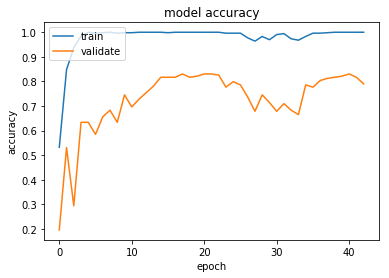

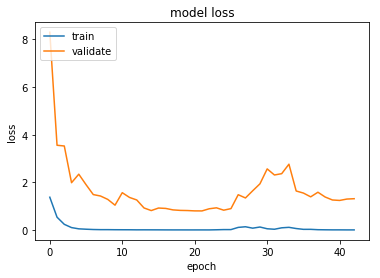

In [62]:
plot_history([history1, history2, history3, history4, history5])

In [63]:
tst = get_data(WORKING_TEST, (360,640))

Found 200 images belonging to 1 classes.


In [66]:
print ("tst:", type(tst), tst.shape)

tst: <type 'numpy.ndarray'> (200, 3, 360, 640)


In [65]:
conv_tst_feat = vgg640.predict(tst, batch_size=32, verbose=1)

200/200 [==============================] - 25s    


In [67]:
print ("conv_tst_feat:", type(conv_tst_feat), conv_tst_feat.shape)

conv_tst_feat: <type 'numpy.ndarray'> (200, 512, 22, 40)


In [68]:
tst_pred = lrg_model.predict(conv_tst_feat, batch_size=32, verbose=1)


192/200 [===========================>..] - ETA: 0s

In [69]:
print ("tst_pred:", type(tst_pred), tst_pred.shape)

tst_pred: <type 'numpy.ndarray'> (200, 8)


In [70]:
tst_pred[0,]

array([  2.1283e-04,   7.4599e-02,   6.0170e-06,   7.7430e-06,   1.0038e-07,   1.4666e-08,
         9.4471e-06,   9.2516e-01], dtype=float32)

In [ ]:
#classes = sorted(batches.class_indices, key=batches.class_indices.get)

In [76]:
conv_model = Sequential(conv_layers)

In [77]:
conv_feat = conv_model.predict(trn)


In [ ]:
print ("conv_feat:", type(conv_feat), conv_feat.shape)

In [78]:
gen = image.ImageDataGenerator()
batches = gen.flow(conv_feat, trn_labels, batch_size=44)

ValueError: NumpyArrayIterator is set to use the dimension ordering convention "th" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (526, 512, 22, 40) (512 channels).

In [ ]:
print ("batches:", type(batches), batches.shape)

In [ ]:
def do_clip(arr, mx): return np.clip(arr, (1-mx)/7, mx)